# **Disease Detection using Symptoms and Treatment recommendation**



In [ ]:
import warnings
from decimal import Decimal
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,precision_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
warnings.simplefilter("ignore")

**Disease Symptom dataset** was created in a separate python program.

**Dataset scrapping** was done using **NHP website** and **wikipedia data**

In [ ]:
df_comb = pd.read_csv("/content/dis_sym_dataset_comb.csv")
X = df_comb.iloc[:, 1:]
Y = df_comb.iloc[:, 0:1]

*Train Test Split*

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.10)

In [ ]:
accuracy_list = []
cross_accuracy_list = []
model_list = []

# **Multinomial Naive Bayes Classifier**

In [ ]:
mnb = MultinomialNB()
mnb = mnb.fit(X, Y)
mnb_pred = mnb.predict(x_test)
acc_mnb = round(Decimal(accuracy_score(y_test, mnb_pred) * 100), 2)
c_r=classification_report(y_test,mnb_pred)
accuracy_list.append(acc_mnb)
model_list.append("MNB")
print(f"Accuracy (MNB) : {acc_mnb}%")
print(((f"Classification Report:{c_r}")))
scores_mnb = cross_val_score(mnb, X, Y, cv=5)
score = round(Decimal(scores_mnb.mean() * 100), 2)
cross_accuracy_list.append(score)
print(f"Cross Validation Accuracy (MNB): {score}%")

Accuracy (MNB) : 85.18%
Classification Report:                                                              precision    recall  f1-score   support

                                 Acute encephalitis syndrome       1.00      0.33      0.50         3
                                Alcohol Abuse and Alcoholism       1.00      1.00      1.00         1
                                                   Alzheimer       1.00      1.00      1.00         3
                                                  Amoebiasis       0.00      0.00      0.00         1
                                                     Anaemia       0.00      0.00      0.00         2
                                                     Anthrax       0.45      0.98      0.62        50
                                                     Anxiety       1.00      1.00      1.00         1
                                                   Arthritis       1.00      1.00      1.00         5
                                   

# **Random Forest Classifier**

In [ ]:
rf = RandomForestClassifier(n_estimators=10, criterion='entropy')
rf = rf.fit(X, Y)
rf_pred = rf.predict(x_test)
acc_rf = round(Decimal(accuracy_score(y_test, rf_pred) * 100), 2)
accuracy_list.append(acc_rf)
c_r=classification_report(y_test,rf_pred)
model_list.append("RF")
print(f"Accuracy (RF) : {acc_rf}%")
print(((f"Classification Report:{c_r}")))
scores_rf = cross_val_score(rf, X, Y, cv=5)
score = round(Decimal(scores_rf.mean() * 100), 2)
cross_accuracy_list.append(score)
print(f"Cross Validation Accuracy (RF): {score}%")

Accuracy (RF) : 90.84%
Classification Report:                                                              precision    recall  f1-score   support

                                 Acute encephalitis syndrome       0.50      0.33      0.40         3
                                Alcohol Abuse and Alcoholism       1.00      1.00      1.00         1
                                                   Alzheimer       1.00      0.67      0.80         3
                                                  Amoebiasis       0.00      0.00      0.00         1
                                                     Anaemia       1.00      1.00      1.00         2
                                                     Anthrax       0.96      0.94      0.95        50
                                                     Anxiety       1.00      1.00      1.00         1
                                                   Arthritis       1.00      1.00      1.00         5
                                   A

# **K-Nearest Neighbor Classifier**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7, weights='distance', n_jobs=4)
knn = knn.fit(X, Y)
knn_pred = knn.predict(x_test)
acc_knn = round(Decimal(accuracy_score(y_test, knn_pred) * 100), 2)
c_r=classification_report(y_test,knn_pred)
accuracy_list.append(acc_knn)
model_list.append("KNN")
print(f"Accuracy (KNN) : {acc_knn}%")
print(((f"Classification Report:{c_r}")))
scores_knn = cross_val_score(knn, X, Y, cv=5)
score = round(Decimal(scores_knn.mean() * 100), 2)
cross_accuracy_list.append(score)
print(f"Cross Validation Accuracy (KNN): {score}%")

Accuracy (KNN) : 90.84%
Classification Report:                                                              precision    recall  f1-score   support

                                 Acute encephalitis syndrome       0.29      0.67      0.40         3
                                Alcohol Abuse and Alcoholism       1.00      1.00      1.00         1
                                                   Alzheimer       1.00      1.00      1.00         3
                                                  Amoebiasis       0.00      0.00      0.00         1
                                                     Anaemia       0.29      1.00      0.44         2
                                                     Anthrax       0.78      1.00      0.88        50
                                                     Anxiety       1.00      1.00      1.00         1
                                                   Arthritis       1.00      1.00      1.00         5
                                   

# **Logistic Regression Classifier**

In [ ]:
lr = LogisticRegression()
lr = lr.fit(X, Y)
lr_pred = lr.predict(x_test)
acc_lr = round(Decimal(accuracy_score(y_test, lr_pred) * 100), 2)
c_r=classification_report(y_test,lr_pred)
accuracy_list.append(acc_lr)
model_list.append("LR")
print(f"Accuracy (LR) : {acc_lr}%")
print(((f"Classification Report:{c_r}")))
scores_lr = cross_val_score(lr, X, Y, cv=5)
score = round(Decimal(scores_lr.mean() * 100), 2)
cross_accuracy_list.append(score)
print(f"Cross Validation Accuracy (LR): {score}%")

Accuracy (LR) : 91.18%
Classification Report:                                                              precision    recall  f1-score   support

                                 Acute encephalitis syndrome       1.00      0.33      0.50         3
                                Alcohol Abuse and Alcoholism       1.00      1.00      1.00         1
                                                   Alzheimer       1.00      0.67      0.80         3
                                                  Amoebiasis       0.00      0.00      0.00         1
                                                     Anaemia       1.00      1.00      1.00         2
                                                     Anthrax       0.82      1.00      0.90        50
                                                     Anxiety       1.00      1.00      1.00         1
                                                   Arthritis       1.00      1.00      1.00         5
                                   A

# **Support Vector Machine Classifier**

In [ ]:
svm = SVC()
svm = svm.fit(X, Y)
svm_pred = svm.predict(x_test)
acc_svm = round(Decimal(accuracy_score(y_test, svm_pred) * 100), 2)
c_r=classification_report(y_test,svm_pred)
accuracy_list.append(acc_svm)
model_list.append("SVM")
print(f"Accuracy (SVM) : {acc_svm}%")
print(((f"Classification Report:{c_r}")))
scores_svm = cross_val_score(svm, X, Y, cv=5)
score = round(Decimal(scores_svm.mean() * 100), 2)
cross_accuracy_list.append(score)
print(f"Cross Validation Accuracy (SVM): {score}%")

Accuracy (SVM) : 90.61%
Classification Report:                                                              precision    recall  f1-score   support

                                 Acute encephalitis syndrome       1.00      0.33      0.50         3
                                Alcohol Abuse and Alcoholism       1.00      1.00      1.00         1
                                                   Alzheimer       1.00      1.00      1.00         3
                                                  Amoebiasis       0.00      0.00      0.00         1
                                                     Anaemia       1.00      1.00      1.00         2
                                                     Anthrax       0.63      0.98      0.77        50
                                                     Anxiety       1.00      1.00      1.00         1
                                                   Arthritis       1.00      1.00      1.00         5
                                   

# **Decision Tree Classifier**

In [ ]:
dt = DecisionTreeClassifier()
dt = dt.fit(X, Y)
dt_pred = dt.predict(x_test)
acc_dt = round(Decimal(accuracy_score(y_test, dt_pred) * 100), 2)
c_r=classification_report(y_test,dt_pred)
accuracy_list.append(acc_dt)
model_list.append("DT")
print(f"Accuracy (DT) : {acc_dt}%")
print(((f"Classification Report:{c_r}")))
scores_dt = cross_val_score(dt, X, Y, cv=5)
score = round(Decimal(scores_dt.mean() * 100), 2)
cross_accuracy_list.append(score)
print(f"Cross Validation Accuracy (DT): {score}%")

Accuracy (DT) : 90.95%
Classification Report:                                                              precision    recall  f1-score   support

                                                     Abscess       0.00      0.00      0.00         0
                                 Acute encephalitis syndrome       0.12      1.00      0.22         3
                                Alcohol Abuse and Alcoholism       1.00      1.00      1.00         1
                                                   Alzheimer       1.00      1.00      1.00         3
                                                  Amoebiasis       0.00      0.00      0.00         1
                                                     Anaemia       0.20      1.00      0.33         2
                                                     Anthrax       0.78      1.00      0.88        50
                                                     Anxiety       1.00      1.00      1.00         1
                                    

# **Multilayer Perceptron Classifier**

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(32, 32, 32), activation='relu', solver='adam', max_iter=50)
mlp = mlp.fit(X, Y)
mlp_pred = mlp.predict(x_test)
acc_mlp = round(Decimal(accuracy_score(y_test, mlp_pred) * 100), 2)
c_r=classification_report(y_test,mlp_pred)
accuracy_list.append(acc_mlp)
model_list.append("MLP")
print(f"Accuracy (MLP) : {acc_mlp}%")
print(((f"Classification Report:{c_r}")))
scores_mlp = cross_val_score(mlp, X, Y, cv=5)
score = round(Decimal(scores_mlp.mean() * 100), 2)
cross_accuracy_list.append(score)
print(f"Cross Validation Accuracy (MLP): {score}%")

Accuracy (MLP) : 91.18%
Classification Report:                                                              precision    recall  f1-score   support

                                 Acute encephalitis syndrome       1.00      0.33      0.50         3
                                Alcohol Abuse and Alcoholism       1.00      1.00      1.00         1
                                                   Alzheimer       1.00      0.67      0.80         3
                                                  Amoebiasis       0.00      0.00      0.00         1
                                                     Anaemia       0.29      1.00      0.44         2
                                                     Anthrax       1.00      0.94      0.97        50
                                                     Anxiety       1.00      1.00      1.00         1
                                                   Arthritis       1.00      1.00      1.00         5
                                   

# **Accuracy Comparison Plot for all the classifiers**

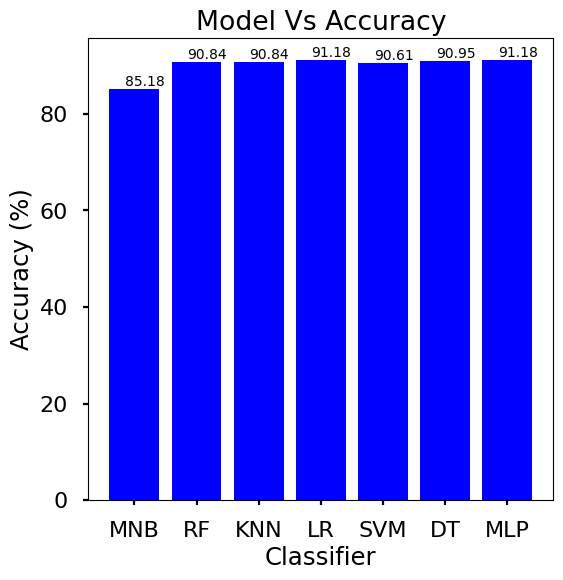

In [ ]:
plt.style.use('seaborn-poster')
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot()
plt.title("Model Vs Accuracy")
plt.xlabel('Classifier')
plt.ylabel('Accuracy (%)')
plt.bar(model_list, accuracy_list, color='blue')
for i, j in enumerate(accuracy_list):
    ax.text(float(i)-0.15, float(j)+0.7, str(j), color='black')
plt.show()